In [13]:
!rm -rf Color_Data_Transformation_and_Visualization_with_Python_Ger
!git clone https://github.com/CarlosKunze/Color_Data_Transformation_and_Visualization_with_Python_Ger.git


Cloning into 'Color_Data_Transformation_and_Visualization_with_Python_Ger'...
remote: Enumerating objects: 38, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 38 (delta 13), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (38/38), 70.98 KiB | 1.16 MiB/s, done.
Resolving deltas: 100% (13/13), done.


# Vergleich der Elementarfarben in der a-b Ebene im CIELab Farbenraum und im DIN99o Farbenraum
## Programmieraufgabe in Python im Labor Farbmetrik
Carlos Kunze, Samir Khayou, SS 23

ΔE∗ab ist für kleine Farbabstände nicht empfindungsgemäß gleichabständig. Aus diesem Grund müssen die Farbabstandsformeln  dem visuellen Empfinden für kleine Farbabstände angeglichen werden. Es wurde die DIN99o-Formel erstellt , welche auch für kleine visuelle Farbdifferenzen gleichabständig ist und somit dem empfundenen Eindruck widerspiegelt. Durch die DIN99o können Farbabstände in verschiedenen Regionen des Farbenraums miteinander verglichen werden.

Durch die Transformation der CIELAB-Koordinaten  L∗ ,  a∗ ,  b∗  in die Koordinaten  L99o,a99o,b99o  entsteht ein zu der DIN99o gehöriger Farbenraum. Bei diesem sind die Achsen im Gegensatz zu dem CIELAB-Koordinatensystem verzerrt. Durch die Transformation der Achsen sind die Farbabstände in diesem Farbenraum visuell gleichabständig. Der Farbabstand wird bei der DIN99o durch den Vektor zwischen Referenz und Probe bestimmt. Der Vorteil der DIN99o ist, dass auch eine Rücktransformation von den  L99o,a99o,b99o -Koordinaten in die  L∗,a∗,b∗ -Koordinaten möglich ist.

In diesem Colab Notebook wird der Code zum ersten Teil der Programmieraufgabe im Rahmen des Farbmertik Labors erklärt. Die Aufgabe besteht aus der Darstellung der Elementarfarben in der a*/b* bzw. der a99o/ b99o ebene des CIELab und des DIN99o Farbenraums. Der Code wurde in der Programmierumgebung "Spyder" geschrieben und zur Dokumentation in dieses Notebook überführt.

Zunächst werden die benötogten Bibilotheken importiert

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

Anschließend werden die benötigten Daten zur berechnung der Elementarfarben als Pandas DataFrame eingelesen. Der Array wird durch den pd.DataFrame befehl direkt in einen DataFrame (im variabel Explorer als Tabelle sichtbar) eingelesen.

In [ ]:
df_elcol=pd.DataFrame({'Farbe': ['R_oe','Y_oe','G_oe', 'B_oe'], 'L_oe':  [75, 89, 79, 60], 'C*_oe':
                        [65, 136, 120, 60], 'h_oe': [26, 92, 162, 272]})
display(df_elcol)

Anschließend werden die Daten mit den entsprechenden Funktionene in a* und b* Koordinaten umgewandelt. Um nicht den Überblick zu verlieren wurde nach jeder Definition ein neue Spalte im DataFrame df_elcol mit den zuvor berechneten Daten hinzugefügt.

In [ ]:
def calc_a(x):
    C = x[2]
    hrad = x[3]*np.pi/180
    a = np.round(C*np.cos(hrad),2)
    return a

def calc_b(x):
    C = x[2]
    hrad = x[3]*np.pi/180
    b = np.round(C*np.sin(hrad), 2)

    return b

df_elcol['a*_oe'] = df_elcol.apply(calc_a, axis=1) #Hinzufügen in die Tabelle(=Pandas DataFrame)
df_elcol['b*_oe'] = df_elcol.apply(calc_b, axis=1)

Mit den berechneten Werten für a* und b* und den Formeln aus ISO 18314-5 werden die Daten nun in a99o und b99o Koordinaten umgewandelt. Die Variablen kc und ke können auf bei den verwendeten Umgebungsbedingungen auf 1 gesetzt werden und können somit aus den Formeln gestichen werden.

In [ ]:
#Transormation in DIN99o
k_e= 1 #Umgebungsbedingungen auf 1 gesetzt
k_c = 1 #Umgebungsbedingungen "-"

def calc_L_99(x):
    L=x[1]      #Spalte mir L_oe in df.elcol
    L_99 = (303.67*math.log(1+0.0039*L))
    return(L_99)

df_elcol['L_99o']= df_elcol.apply(calc_L_99, axis=1)#['L_99o'] setzt name der Spalte fest, .apply hängt neue Daten an, axis = 1 muss dabei sein
#%%
#Hilfsvariablen
def calc_e_o(x):
    a=x[4]
    b=x[5]
    e_o = a*np.cos((26*np.pi)/180) + b*np.sin((26*np.pi)/180)
    return(e_o)

df_elcol['e_o']=df_elcol.apply(calc_e_o, axis=1)

def calc_f_o(x):
    a=x[4]
    b=x[5]
    f_o = 0.83*(-a*np.sin(26*np.pi/180) + b*np.cos(26*np.pi/180))
    return(f_o)

df_elcol['f_o']=df_elcol.apply(calc_f_o, axis=1)

def calc_G_o(x):
    e_o=x[7]
    f_o=x[8]
    G_o=(e_o**2+f_o**2)**0.5
    return(G_o)
df_elcol['G_o']=df_elcol.apply(calc_G_o, axis=1)

def calc_h_eofo(x):
    e_o=x[7]
    f_o=x[8]
    if (e_o > 0 and f_o >= 0):
            h_eofo = np.arctan(f_o/e_o)
    elif (e_o == 0 and f_o > 0):
            h_eofo = np.pi/2
    elif (e_o < 0):
            h_eofo = np.pi + np.arctan(f_o/e_o)
    elif (e_o == 0 and f_o < 0):
            h_eofo = 3*np.pi/2
    elif (e_o > 0 and  f_o < 0):
            h_eofo = 2*np.pi + np.arctan(f_o/e_o)
    elif (e_o == 0 and f_o==0):
            h_eofo = 0
    return(h_eofo)

df_elcol['h_eofo']=df_elcol.apply(calc_h_eofo, axis=1)
#%%
#Bunttonwinkel h_99o

def calc_h_99o(x):
    h_eofo=x[10]
    if (h_eofo < 334*np.pi/180):
            h_99o = h_eofo*180/np.pi + 26
    elif (h_eofo >= 334*np.pi/180):
            h_99o = (h_eofo - 2*np.pi)*180/np.pi + 26
    return h_99o
df_elcol['h_99o']=df_elcol.apply(calc_h_99o, axis=1)

#%%
#Chroma C_99o

def calc_C_99o(x):
   G_o=x[9]
   C_99o = (np.log(1+0.075*G_o))/(0.0435)
   return(C_99o)
df_elcol['G_99o']=df_elcol.apply(calc_C_99o, axis=1)

#%%
#Berechnung der Rot - Grün Achste a_99o

def calc_a_99o(x):
    C_99o=x[12]
    h_99o=x[11]
    a_99o = C_99o*np.cos(h_99o*np.pi/180)
    return(a_99o)
df_elcol['a_99o']=df_elcol.apply(calc_a_99o, axis=1)

#%%
#Berechnung Blau - Gelb Achso b_99o

def calc_b_99o(x):
   C_99o=x[12]
   h_99o=x[11]
   b_99o = C_99o*np.sin(h_99o*np.pi/180)
   return(b_99o)
df_elcol['b_99o']=df_elcol.apply(calc_b_99o, axis=1)

Nun sind alle Daten im DataFrame df_elcol enthalten und es können die Diagramme erstellt werden.

(array([-60., -40., -20.,   0.,  20.,  40.,  60.]),
 [Text(0, -60.0, '−60'),
  Text(0, -40.0, '−40'),
  Text(0, -20.0, '−20'),
  Text(0, 0.0, '0'),
  Text(0, 20.0, '20'),
  Text(0, 40.0, '40'),
  Text(0, 60.0, '60')])

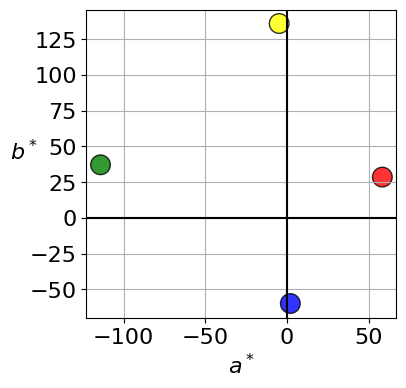

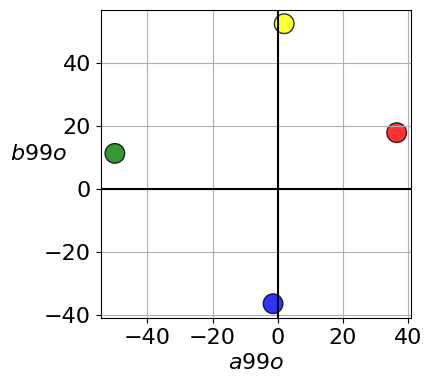

In [7]:
# Darstellung Elementarfarben on CIELab in a-b ebene
plt.figure(figsize=(4, 4), dpi=100)
elcolors = ['red', 'yellow', 'green', 'blue']
plt.scatter(df_elcol['a*_oe'], df_elcol['b*_oe'], s=200, c = elcolors, alpha = 0.8, edgecolor='k')
plt.axhline(linewidth=1.5, color='k')
plt.axvline(linewidth=1.5, color='k')
plt.xlabel('$a^*$', fontsize=16)
plt.ylabel('$b^*$', rotation=0, fontsize=16)
plt.grid()
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#%%
#Darstellung im Diagramm, 2D, a_99o - b_99o ebene

plt.figure(figsize=(4,4), dpi=100)
elcolors = ['red', 'yellow', 'green', 'blue']
plt.scatter(df_elcol['a_99o'],df_elcol['b_99o'], s=200, c = elcolors, alpha = 0.8, edgecolor='k')
plt.axhline(linewidth=1.5, color='k')
plt.axvline(linewidth=1.5, color='k')
plt.xlabel(r'$a99o$', fontsize=16)
plt.ylabel(r'$b99o$', rotation=0, fontsize=16)
plt.grid()
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

Die Elementarfarben liegen in den Farbenräumen unterschiedlich im Raum. ΔE∗ in CIELab  ist für kleine Farbabstände nicht empfindungsgemäß gleichabständig. Aus diesem Grund müssen die Farbabstandsformeln aus dem visuellen Empfinden für kleine Farbabstände angeglichen werden. Durch Verzerrung der Achsen in DIN99o wird diese Gleichabständigkeit erreicht. Dadurch liegen die Elementarfarben auch verschieden Orten in der a99o-b99o als in der CIELab a*-b* Ebene.  